In [3]:
import numpy as np
import pandas as pd
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Load the dataset
df = pd.read_csv('statlog.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [5]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [6]:
### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 0, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df['sex'] = df.sex.map({'female': 0, 'male': 1})

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [8]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable



In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression


In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
lr_pred = model.predict(X_test)

Accuracy: 0.7685185185185185


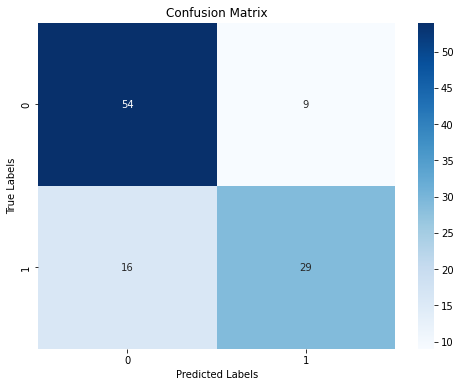

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# SVM

# Linear Kernel

In [14]:
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
svm_l_pred = svm_model.predict(X_test)

Accuracy: 0.75


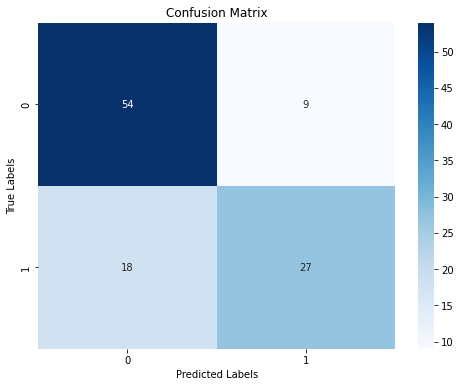

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_l_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_l_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Polynomial Kernel

In [17]:
svm_model = SVC(kernel='poly') 
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [18]:
svm_p_pred = svm_model.predict(X_test)

Accuracy: 0.7870370370370371


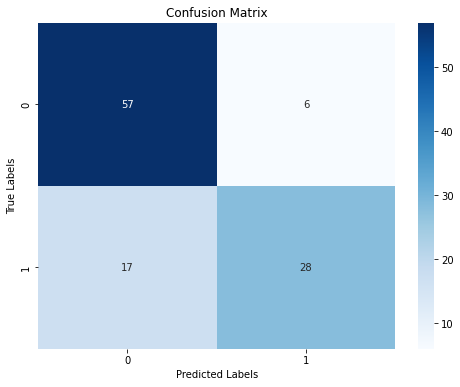

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_p_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_p_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# RBF Kernel

In [20]:
svm_model = SVC(kernel='rbf') 
svm_model.fit(X_train, y_train)

SVC()

In [21]:
svm_r_pred = svm_model.predict(X_test)

Accuracy: 0.7777777777777778


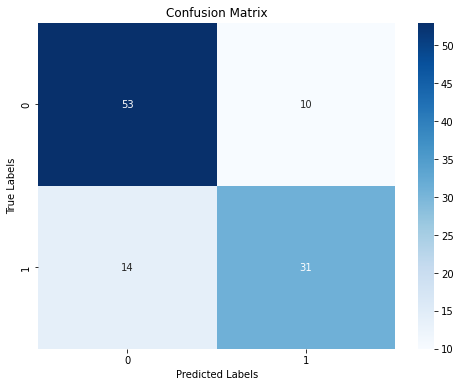

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_r_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, svm_r_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
nb_pred = nb_classifier.predict(X_test)

Accuracy: 0.8055555555555556


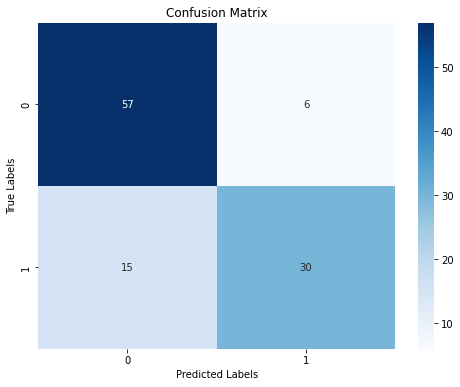

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, nb_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
dt_predictions = dt_model.predict(X_test)

Accuracy: 0.6666666666666666


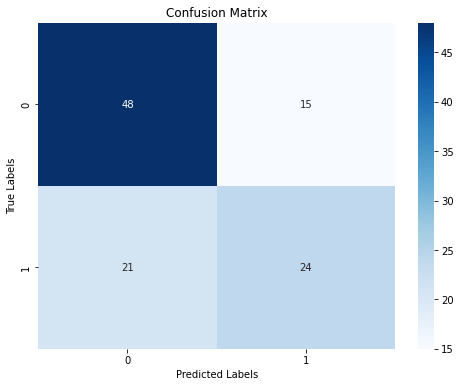

In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
rf_predictions = rf_model.predict(X_test)


Accuracy: 0.8240740740740741


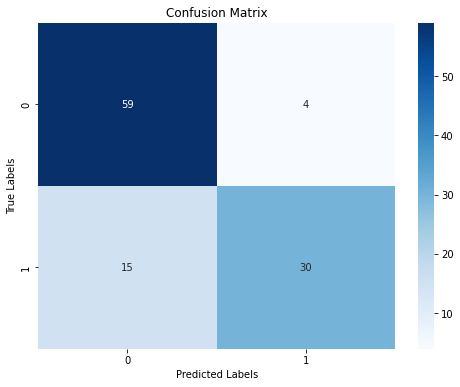

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# KNN

In [35]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = sklearn.neighbors.KNeighborsClassifier()


In [37]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
knn_predictions = knn_model.predict(X_test)


Accuracy: 0.8148148148148148


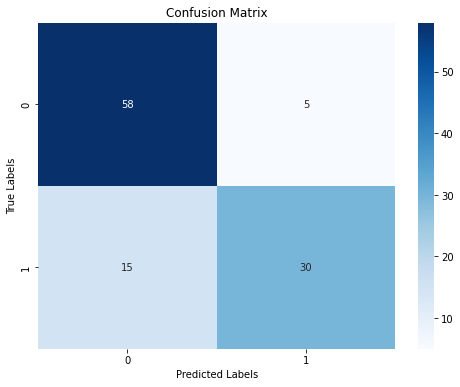

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
gb_predictions = gb_model.predict(X_test)


Accuracy: 0.75


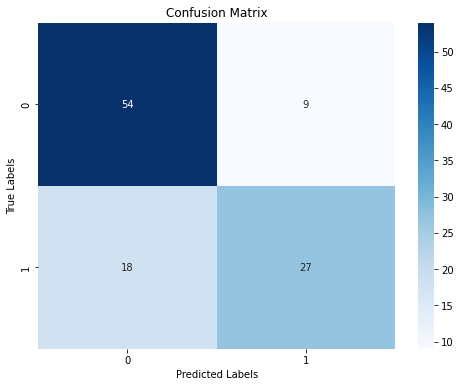

In [43]:
# Calculate accuracy
accuracy = accuracy_score(y_test, gb_predictions)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, gb_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# ELM Classifier

In [44]:
from sklearn_extensions.extreme_learning_machines.elm import ELMClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass neg_label=-1, pos_label=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [45]:
elm = ELMClassifier() 
elm.fit(X_train, y_train)

ELMClassifier()

In [46]:
elm_pred = elm.predict(X_test)


Accuracy: 0.7685185185185185


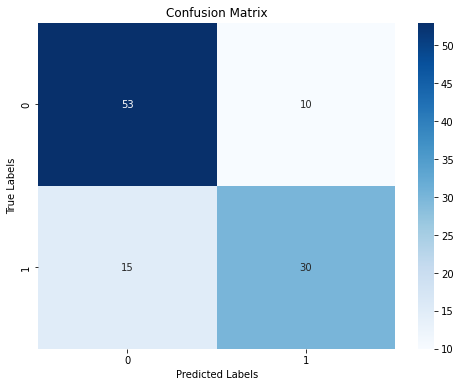

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, elm_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, elm_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Adaboost Classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Create a base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1)  # Stump

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
adaboost_pred = adaboost_classifier.predict(X_test)



Accuracy: 0.7407407407407407


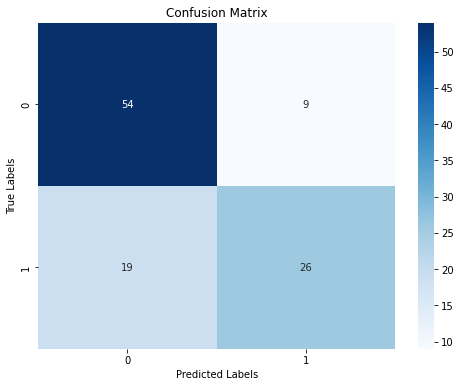

In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, adaboost_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Ridge Classifier

In [51]:
from sklearn.linear_model import RidgeClassifier

In [52]:
# Create a Ridge Classifier
ridge_classifier = RidgeClassifier(alpha=1.0, random_state=42)  # alpha is the regularization parameter

# Train the Ridge Classifier
ridge_classifier.fit(X_train, y_train)

# Make predictions on the test set
ridge_pred = ridge_classifier.predict(X_test)


Accuracy: 0.7870370370370371


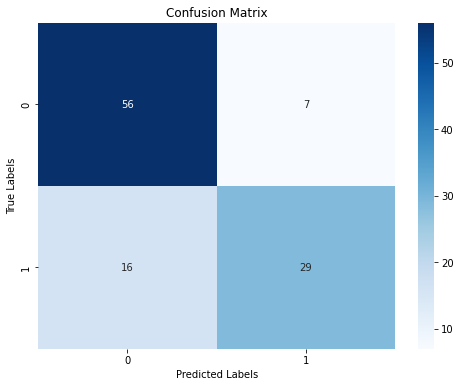

In [53]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ridge_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, ridge_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Lasso Classifier

In [54]:
from sklearn.linear_model import Lasso

In [55]:
# Create a Lasso Classifier
lasso_classifier = Lasso(alpha=1.0, random_state=42)  # alpha is the regularization parameter

# Train the Lasso Classifier
lasso_classifier.fit(X_train, y_train)

# Make predictions on the test set
lasso_pred = lasso_classifier.predict(X_test)

# Convert predictions to class labels (for classification)
lasso_pred_class = [round(val) for val in lasso_pred]



Accuracy: 0.5833333333333334


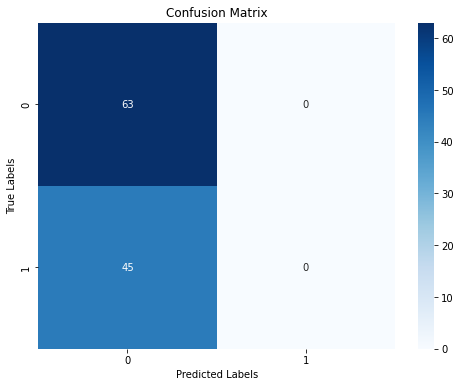

In [56]:
# Calculate accuracy
accuracy = accuracy_score(y_test, lasso_pred_class)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, lasso_pred_class)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Passive Aggressive Classifier

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [58]:
# Create a Passive-Aggressive Classifier
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=42)  # C is the regularization parameter

# Train the Passive-Aggressive Classifier
pa_classifier.fit(X_train, y_train)

# Make predictions on the test set
pa_pred = pa_classifier.predict(X_test)



Accuracy: 0.7777777777777778


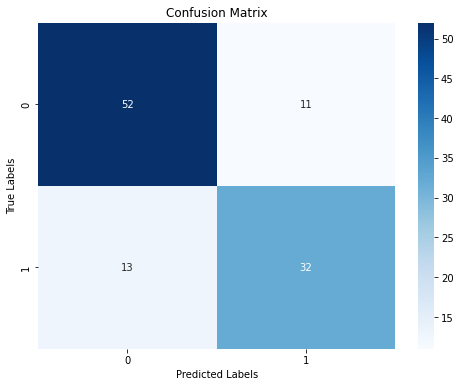

In [59]:
# Calculate accuracy
accuracy = accuracy_score(y_test, pa_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, pa_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Gaussian Process Classifier

In [60]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


In [61]:
# Create a Gaussian Process Classifier
kernel = 1.0 * RBF(length_scale=1.0)  # Radial basis function (RBF) kernel
gp_classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process Classifier
gp_classifier.fit(X_train, y_train)

# Make predictions on the test set
gp_pred = gp_classifier.predict(X_test)



Accuracy: 0.7870370370370371


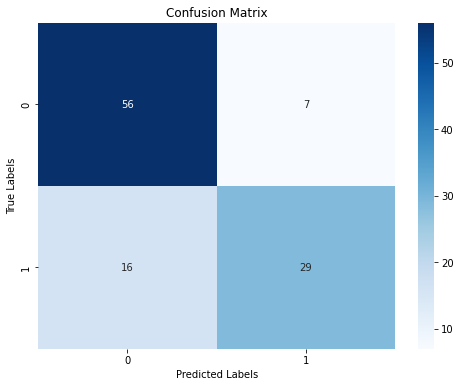

In [62]:
# Calculate accuracy
accuracy = accuracy_score(y_test, gp_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, gp_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Nearest Centroid Classifier

In [63]:
from sklearn.neighbors import NearestCentroid


In [64]:
# Create a Nearest Centroid Classifier
centroid_classifier = NearestCentroid()

# Train the Nearest Centroid Classifier
centroid_classifier.fit(X_train, y_train)

# Make predictions on the test set
ncc_pred = centroid_classifier.predict(X_test)



Accuracy: 0.8148148148148148


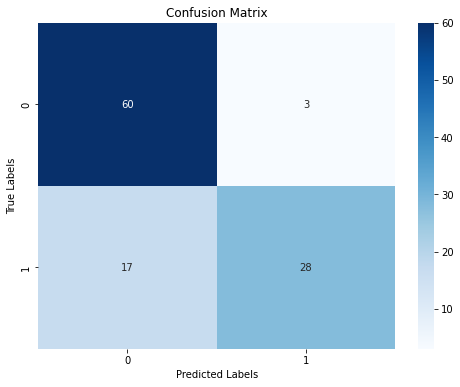

In [65]:
# Calculate accuracy
accuracy = accuracy_score(y_test, ncc_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, ncc_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
# Combine predictions using majority voting
ensemble_pred = np.round((lr_pred + svm_l_pred + svm_p_pred + svm_r_pred + rf_predictions + knn_predictions + gb_predictions + adaboost_pred + ridge_pred + gp_pred) / 10)


In [68]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, ensemble_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[57  6]
 [16 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        63
           1       0.83      0.64      0.73        45

    accuracy                           0.80       108
   macro avg       0.80      0.77      0.78       108
weighted avg       0.80      0.80      0.79       108



In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import cross_val_score

In [70]:
# List of base models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM Linear Kernel", SVC(kernel="linear")),
    ("SVM Polynomial Kernel", SVC(kernel="poly")),
    ("SVM RBF Kernel", SVC(kernel="rbf")),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("Ridge Classifier", RidgeClassifier()),
    ("Gaussian Process Classifier", GaussianProcessClassifier(random_state=42))
]

In [71]:
# Train and validate base models
base_model_predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    base_model_predictions.append(predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.7685
SVM Linear Kernel - Accuracy: 0.7500
SVM Polynomial Kernel - Accuracy: 0.7870
SVM RBF Kernel - Accuracy: 0.7778
Random Forest - Accuracy: 0.7593
KNN - Accuracy: 0.8148
Gradient Boosting - Accuracy: 0.7500
AdaBoost - Accuracy: 0.7407
Ridge Classifier - Accuracy: 0.7870
Gaussian Process Classifier - Accuracy: 0.7315


In [72]:
# Create a meta-classifier (ensemble) for combining predictions
meta_classifier_input = np.array(base_model_predictions).T
meta_classifier = XGBClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_classifier_input, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [73]:
# Evaluate the ensemble on the validation set
ensemble_pred = []
for predictions in base_model_predictions:
    ensemble_pred.append(predictions)
ensemble_pred = np.array(ensemble_pred).T
meta_predictions = meta_classifier.predict(ensemble_pred)


In [74]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, meta_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, meta_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Confusion Matrix:
[[59  4]
 [13 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        63
           1       0.89      0.71      0.79        45

    accuracy                           0.84       108
   macro avg       0.85      0.82      0.83       108
weighted avg       0.85      0.84      0.84       108

Ensemble Accuracy: 0.8426


In [78]:
("Logistic Regression", LogisticRegression(max_iter=1000)),
("Ridge Classifier", RidgeClassifier()),
    ("KNN", KNeighborsClassifier()),
        

IndentationError: unexpected indent (Temp/ipykernel_10432/3826365127.py, line 3)

In [75]:
# List of base models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM Linear Kernel", SVC(kernel="linear")),
    ("SVM Polynomial Kernel", SVC(kernel="poly")),
    ("SVM RBF Kernel", SVC(kernel="rbf")),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGB Classifier", XGBClassifier(n_estimators=100, random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("Gaussian Process Classifier", GaussianProcessClassifier(random_state=42))
]

In [76]:
# Train and validate base models
base_model_predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    base_model_predictions.append(predictions)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy:.4f}")


Logistic Regression - Accuracy: 0.7685
SVM Linear Kernel - Accuracy: 0.7500
SVM Polynomial Kernel - Accuracy: 0.7870
SVM RBF Kernel - Accuracy: 0.7778
Random Forest - Accuracy: 0.7593
XGB Classifier - Accuracy: 0.7222
KNN - Accuracy: 0.8148
Gradient Boosting - Accuracy: 0.7500
AdaBoost - Accuracy: 0.7407
Gaussian Process Classifier - Accuracy: 0.7315


In [77]:
# Create a meta-classifier (ensemble) for combining predictions
meta_classifier_input = np.array(base_model_predictions).T
meta_classifier = XGBClassifier(n_estimators=100, random_state=42)
meta_classifier.fit(meta_classifier_input, y_test)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [78]:
# Evaluate the ensemble on the validation set
ensemble_pred = []
for predictions in base_model_predictions:
    ensemble_pred.append(predictions)
ensemble_pred = np.array(ensemble_pred).T
meta_predictions = meta_classifier.predict(ensemble_pred)


In [79]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, meta_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, meta_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Confusion Matrix:
[[59  4]
 [12 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        63
           1       0.89      0.73      0.80        45

    accuracy                           0.85       108
   macro avg       0.86      0.83      0.84       108
weighted avg       0.86      0.85      0.85       108

Ensemble Accuracy: 0.8519


In [80]:
# List of base models

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

svm_l_model = SVC(kernel="linear")
svm_l_model.fit(X_train, y_train)

svm_p_model = SVC(kernel="poly")
svm_p_model.fit(X_train, y_train)

svm_r_model = SVC(kernel="rbf")
svm_r_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

gpc_model = GaussianProcessClassifier(random_state=42)
gpc_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
svm_l_predictions = svm_l_model.predict(X_test)
svm_p_predictions = svm_p_model.predict(X_test)
svm_r_predictions = svm_r_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
ab_predictions = ab_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
gpc_predictions = gpc_model.predict(X_test)


# Combine predictions using ensemble (Voting Classifier)
ensemble_predictions = np.column_stack((lr_predictions, svm_l_predictions, svm_p_predictions, svm_r_predictions, 
                                        rf_predictions, knn_predictions, gb_predictions, 
                                        ab_predictions, xgb_predictions, gpc_predictions))


# Perform majority voting to get the final prediction
final_predictions = np.mean(ensemble_predictions, axis=1) >= 0.5
final_predictions = final_predictions.astype("int32")

# Calculate accuracy of the ensemble
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, final_predictions)
print("Classification Report:")
print(class_report)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Ensemble Accuracy: 0.7870
Confusion Matrix:
[[56  7]
 [16 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        63
           1       0.81      0.64      0.72        45

    accuracy                           0.79       108
   macro avg       0.79      0.77      0.77       108
weighted avg       0.79      0.79      0.78       108

Ensemble Accuracy: 0.7870
